## Packages

### Install

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -U statsmodels

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


### Import

In [12]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import seaborn as sns # seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import pyreadstat # for reading .sav file

from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split # for separating train and test data, scaling, model building, ...
from scipy import stats # it contains a large number of statistics, probability distributions functions
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python
from sklearn.impute import KNNImputer # Imputation for completing missing values using k-Nearest Neighbors
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer # Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion
from sklearn.ensemble import RandomForestClassifier # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from xgboost import XGBClassifier, XGBRFClassifier

from boruta import BorutaPy # Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler# Implementation of SMOTE - Synthetic Minority Over-sampling Technique , ADASYN, ROSE
from imblearn.combine import SMOTEENN
from collections import Counter # A Counter is a container that keeps track of how many times equivalent values are added
from sklearn.metrics import plot_confusion_matrix # plot confusion matrix
from sklearn.metrics import accuracy_score # Accuracy classification score
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics.
from sklearn import preprocessing # provides the StandardScaler utility class, which is a quick and easy way to perform operations
from sklearn.preprocessing import StandardScaler # To normalize the data for KNNImputer
from sklearn.manifold import TSNE # To visualize high dimensional data
from collections import Counter # To save the counted values as dict keys
from sklearn.decomposition import PCA #PCA Analysis
from sklearn.pipeline import Pipeline #Pipeline to connect scalers and classifiers
from matplotlib.pyplot import figure #Plot graph
from sklearn.metrics import roc_curve, roc_auc_score #Evaluate ROC curve
from sklearn.metrics import cohen_kappa_score

from sklearn.model_selection import RandomizedSearchCV

## 1. Read Data

In [13]:
# reading data as a data frame, setting ID as the index and getting the number of rows and columns
#df = pd.DataFrame(pd.read_spss("../data/secom_mod.SAV"))
df= pd.read_spss(r'C:\Users\s0576758\Desktop\HTW\Data Mining - Tilo\secom_mod.SAV')
df = df.set_index('ID')
df.shape

(1567, 592)

## 2. Explore data

#### 2.1. Shape and type

In [14]:
# shape of the data set
print('Shape: ',df.shape)  

Shape:  (1567, 592)


In [15]:
# checking data types of the features
print(df.info(),"\n")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1567 entries, 1.0 to 1567.0
Columns: 592 entries, class to feature590
dtypes: float64(591), object(1)
memory usage: 7.1+ MB
None 

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object


#### 2.2. Duplicates

In [16]:
# Check for duplicated rows
df.duplicated().any()

False

In [17]:
#Check for duplicated columns
#df.columns.duplicated().any()

listofName = list(df.columns)
testID = df[[c for c in df if c not in listofName]]
#its runnig for the whole DF
testRows = df[df.duplicated()]
testRows.head()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,


In [18]:
####Test

#### 2.3. Pass / Fail ratio

In [19]:
# number of pass and fail values
df['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

In [20]:
# pie chart of the target variable
def ClassDistributionGraph(df, title):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    
    labels = ['Pass', 'Fail']
    distribution = df.value_counts()
    colors = ['lightblue', 'yellowgreen']

    # Plot
    plt.pie(distribution, labels=labels, colors=colors, autopct= lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*distribution.sum()), shadow=True, startangle=140,)
    plt.title(title, fontsize=15)
    plt.axis('equal')
    plt.show()

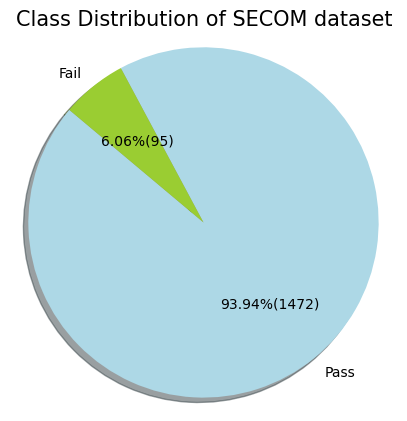

In [21]:
ClassDistributionGraph(df['class'], 'Class Distribution of SECOM dataset')

#### 2.4. Histogram of features

23 9 8 3


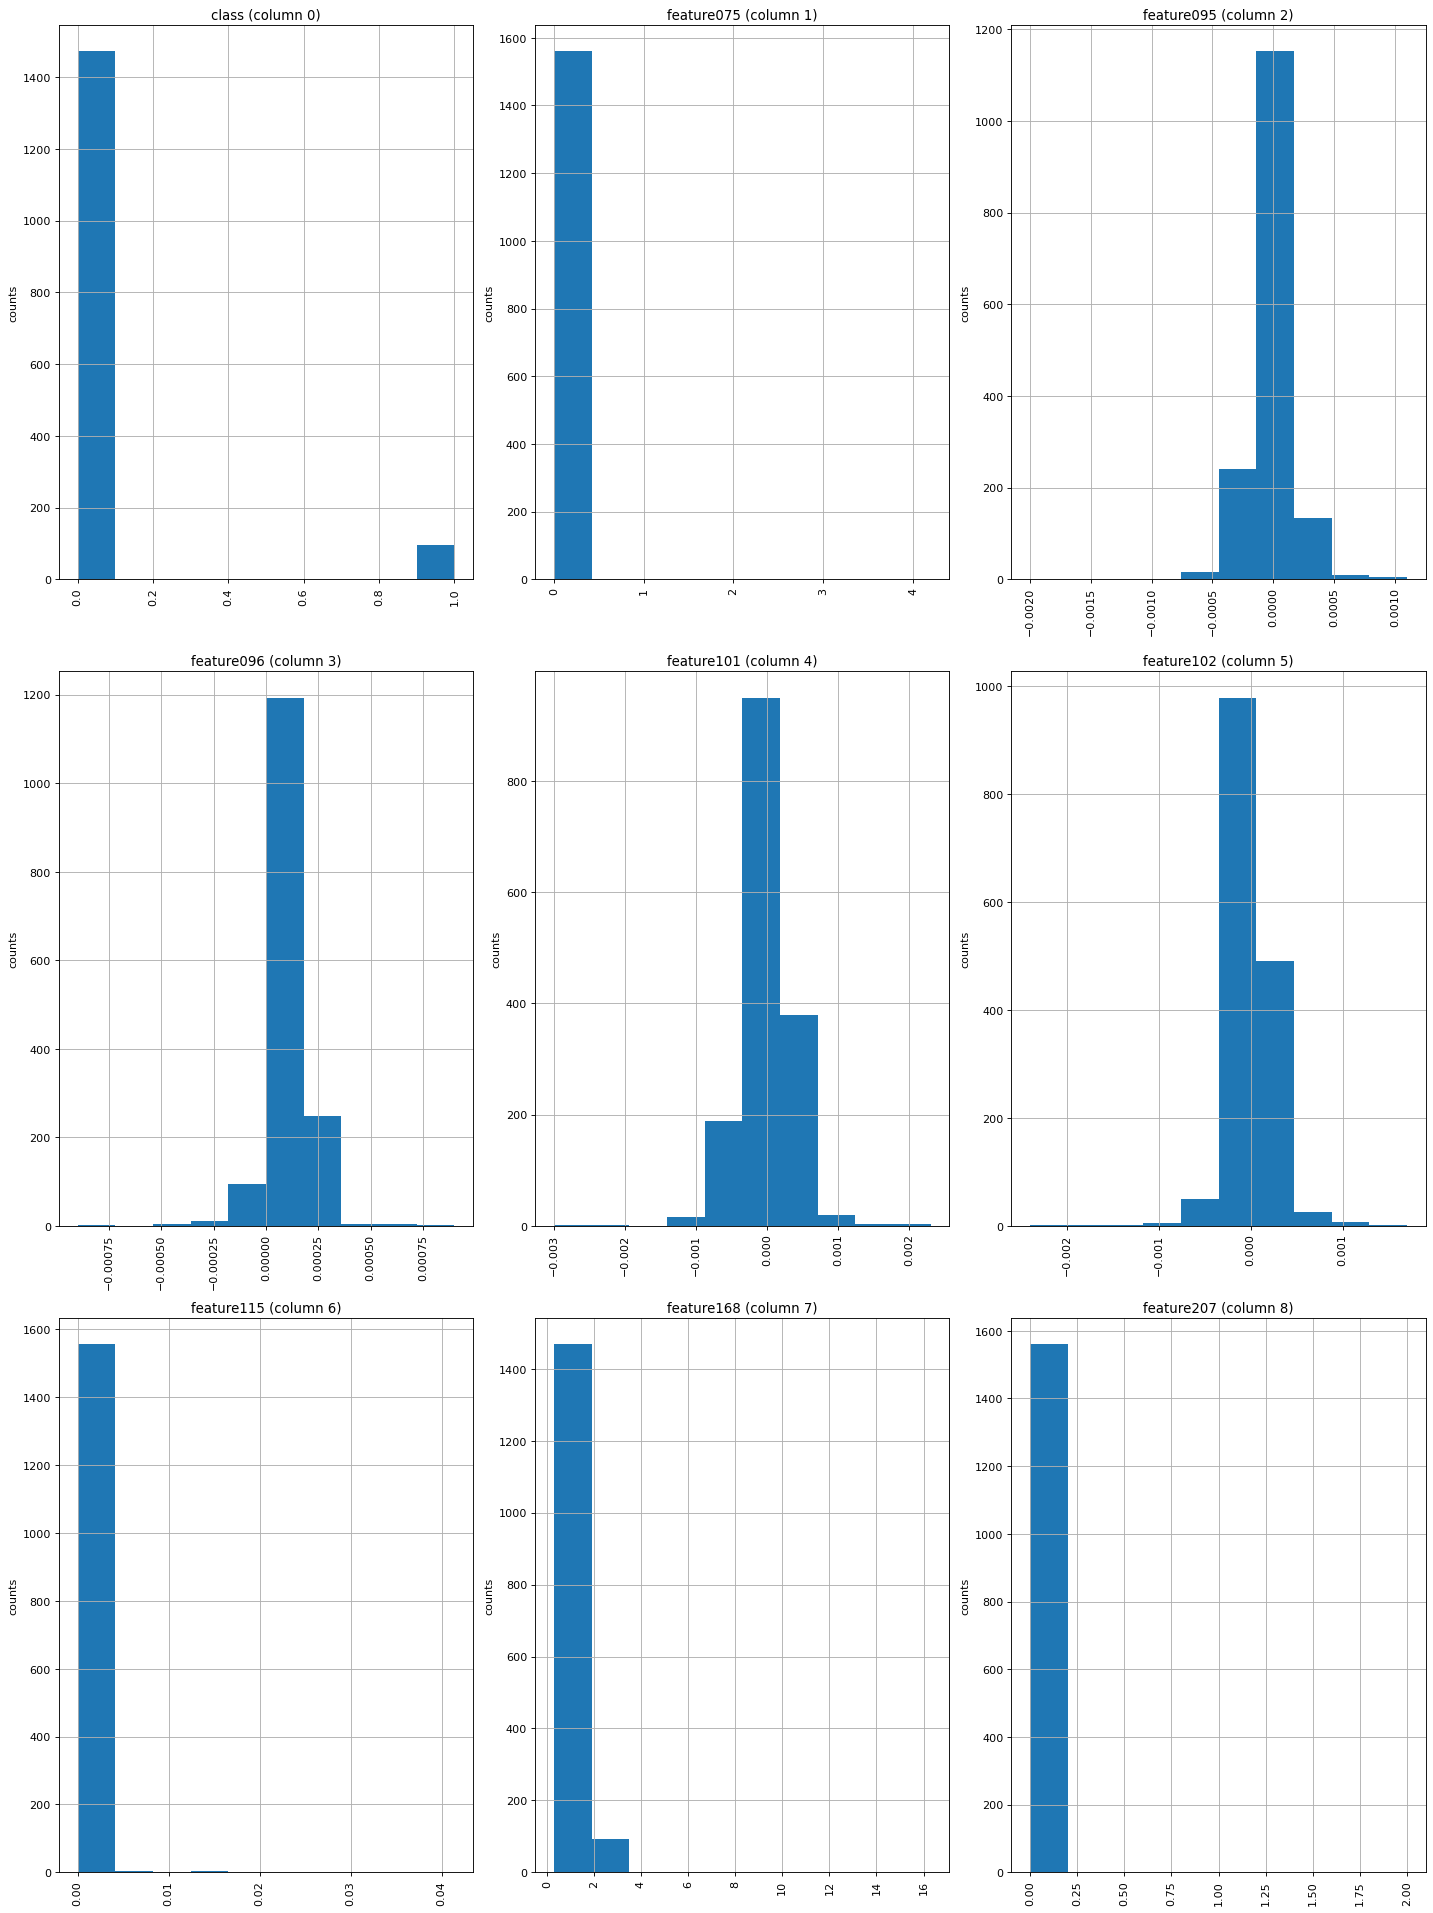

In [22]:
# histogram of some of the features
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
 
    
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    %matplotlib inline
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
   
    print(nCol, nGraphShown, nGraphRow, nGraphPerRow)
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 9, 3)

#### 2.5. Correlation

In [23]:
# Correlation Histogram

def correlation(df):
    cor_matrix = pd.DataFrame(df.corr())

    # Remove reuntant values by selecting only the upper correlation triangle
    upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool)))

    # Convert the upper correlation triangle to a Series
    corlist = pd.Series(upper_tri.values.ravel('F'))

    # Correlation Histogram
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    # Plot Histogram on x
    plt.hist(corlist, bins =50)
    plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient');

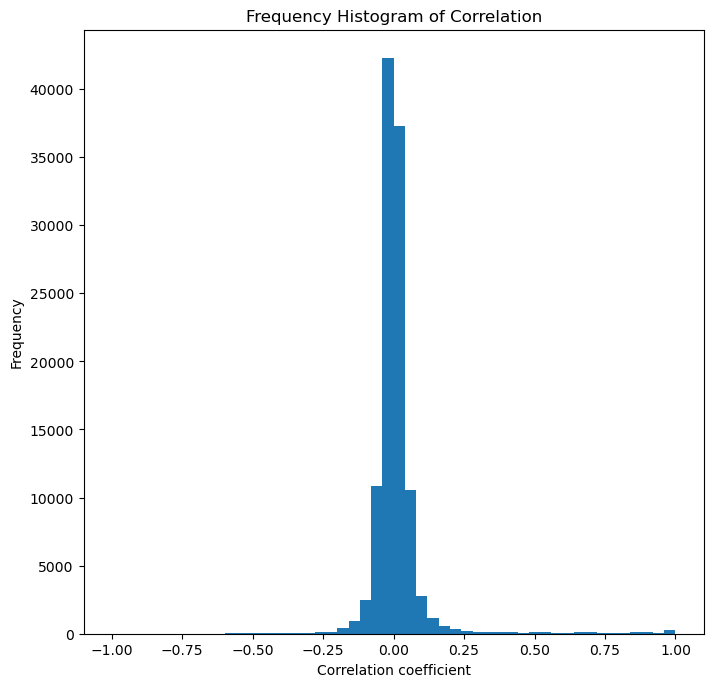

In [24]:
correlation(df)

#### 2.6. Missing values

In [25]:
# Total number of Nan values in the dataframe
df.isna().sum().sum()

41951

In [26]:
#number of cols with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print('number of columns with missing values = ', len(nan_cols))

#number of rows with Nan values
nan_rows = df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows
print('number of rows with missing values = ', len(nan_rows))

number of columns with missing values =  538
number of rows with missing values =  1567


## 3. Preprocessing

In [27]:
# Give text labels to the training examples
df['class'] = df['class'].replace({0: "PASS", 1: "FAIL"})
df.tail()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1563.0,PASS,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1564.0,PASS,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1565.0,PASS,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1566.0,PASS,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941
1567.0,PASS,17/10/2008 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,...,0.0045,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844


## 4. Data Preparation

### 4.1.Splitting Traninig and Test Data

In [28]:
# Split df into X and y
y = df['class']
X = df.drop('class', axis=1)

In [29]:
# Train-test split
X_train, X_test_ , y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle=True, random_state=40, stratify=y)

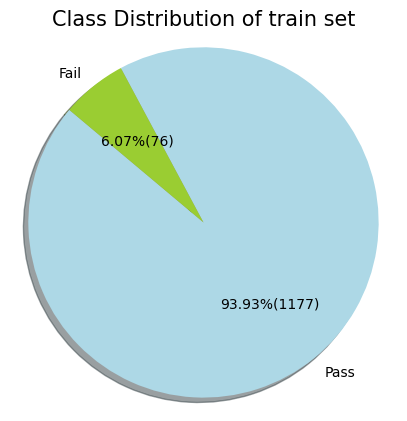

In [30]:
# pie chart for the train set
ClassDistributionGraph(y_train, 'Class Distribution of train set')

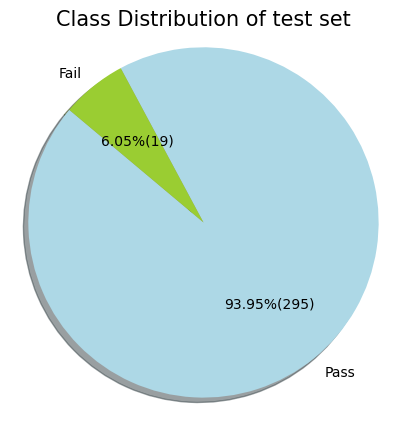

In [31]:
# pie chart for the test set
ClassDistributionGraph(y_test, 'Class Distribution of test set')

### 4.2 Rough feature reduction

#### 4.2.1 Removal of timestamp

In [32]:
# removing timestamp
X_train= X_train.drop(columns='timestamp')

#### 4.2.2 Removal of constants

In [33]:
#columns that have the same value excluding nan
print(len(X_train.columns[X_train.nunique() == 1]))

#column names with same value in it
X_train.columns[X_train.nunique() == 1]
print(list(X_train.columns[X_train.nunique() == 1]))

#remove these columns since it adds no value
single_value_columns = list(X_train.columns[X_train.nunique() == 1])
X_train=X_train.drop(columns=single_value_columns)
X_train

116
['feature006', 'feature014', 'feature043', 'feature050', 'feature053', 'feature070', 'feature098', 'feature142', 'feature150', 'feature179', 'feature180', 'feature187', 'feature190', 'feature191', 'feature192', 'feature193', 'feature194', 'feature195', 'feature227', 'feature230', 'feature231', 'feature232', 'feature233', 'feature234', 'feature235', 'feature236', 'feature237', 'feature238', 'feature241', 'feature242', 'feature243', 'feature244', 'feature257', 'feature258', 'feature259', 'feature260', 'feature261', 'feature262', 'feature263', 'feature264', 'feature265', 'feature266', 'feature267', 'feature277', 'feature285', 'feature314', 'feature315', 'feature316', 'feature323', 'feature326', 'feature327', 'feature328', 'feature329', 'feature330', 'feature331', 'feature365', 'feature370', 'feature371', 'feature372', 'feature373', 'feature374', 'feature375', 'feature376', 'feature379', 'feature380', 'feature381', 'feature382', 'feature395', 'feature396', 'feature397', 'feature398', '

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,2484.55,2242.8555,1430.7270,0.8832,106.2100,0.1216,1.5613,-0.0028,0.0008,...,NaN,NaN,0.4979,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057
1261.0,2953.63,2384.04,2191.2111,1437.5003,2.2073,97.6444,0.1235,1.3584,-0.0024,-0.0048,...,NaN,NaN,0.4968,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
1041.0,3021.61,2440.29,2227.2222,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,...,NaN,NaN,0.5091,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
1181.0,3093.46,2479.17,2221.3667,2490.6947,1.2667,88.6578,0.1220,1.3537,0.0134,-0.0039,...,NaN,NaN,0.5006,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
611.0,3010.40,NaN,2172.4000,1148.4101,1.2614,102.4522,0.1227,1.3843,-0.0010,-0.0004,...,NaN,NaN,0.5015,0.0137,0.0034,2.7339,0.0252,0.0157,0.0046,62.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,2453.53,2188.7222,1325.5230,1.1721,105.1700,0.1250,1.4480,-0.0233,0.0087,...,NaN,NaN,0.4949,0.0155,0.0034,3.1238,0.0253,0.0058,0.0018,22.7661
1101.0,2880.58,2489.76,2256.6000,2365.4787,1.1384,85.4278,0.1205,1.6114,0.0484,0.0043,...,0.0076,50.7949,0.5032,0.0117,0.0029,2.3282,0.0398,0.0202,0.0076,50.7949
1469.0,2968.78,2451.53,2207.1000,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,...,0.0084,185.3578,0.4972,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578


#### 4.2.3. Checking for columns more than 55% nan values

In [34]:
# count the number of missing values for each column
num_missing = pd.DataFrame((X_train.isna()).sum())
print(num_missing.sort_values(0))

               0
feature360     0
feature223     0
feature224     0
feature249     0
feature250     0
...          ...
feature359  1078
feature294  1140
feature158  1140
feature159  1140
feature293  1140

[474 rows x 1 columns]


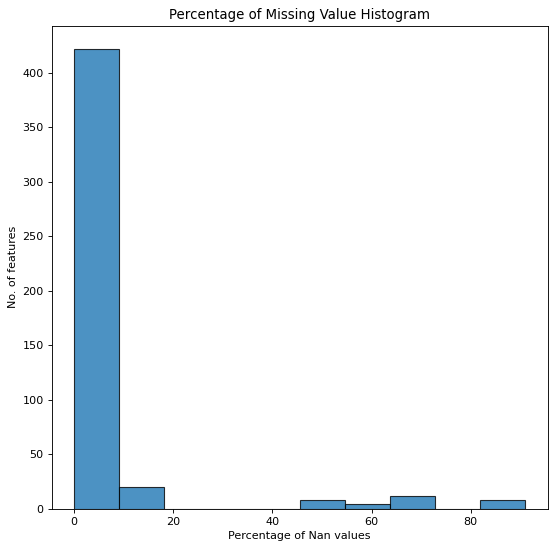

In [35]:
# Missing Value histogram
nan_perc = pd.DataFrame(round((X_train.isnull().sum() * 100/ len(X_train)),2))
nan_perc = nan_perc.reset_index()
nan_perc = nan_perc.rename({'index': 'feature', 0: 'percentage'}, axis=1)

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':80})
n,bins,patch = plt.hist(nan_perc['percentage'],bins=10, alpha=0.8, label='Value', edgecolor='black', linewidth=1)
plt.gca().set(title='Percentage of Missing Value Histogram', ylabel='No. of features', xlabel='Percentage of Nan values')
plt.show()

In [36]:
# Defining a threshold to remove the values above it
threshold= 0.7
pct_null = X_train.isnull().sum() / len(X_train)
missing_value_cols = pct_null[pct_null >= threshold].index

# number of features containing more than 55% missing values
print(len(missing_value_cols))
print(missing_value_cols)

X_train = X_train.drop(missing_value_cols, axis=1)

8
Index(['feature086', 'feature158', 'feature159', 'feature221', 'feature293',
       'feature294', 'feature359', 'feature493'],
      dtype='object')


#### 4.2.5. Less volatile

In [37]:
# Exploring  remaining features
summary = X_train.iloc[:,:].describe(include='all')

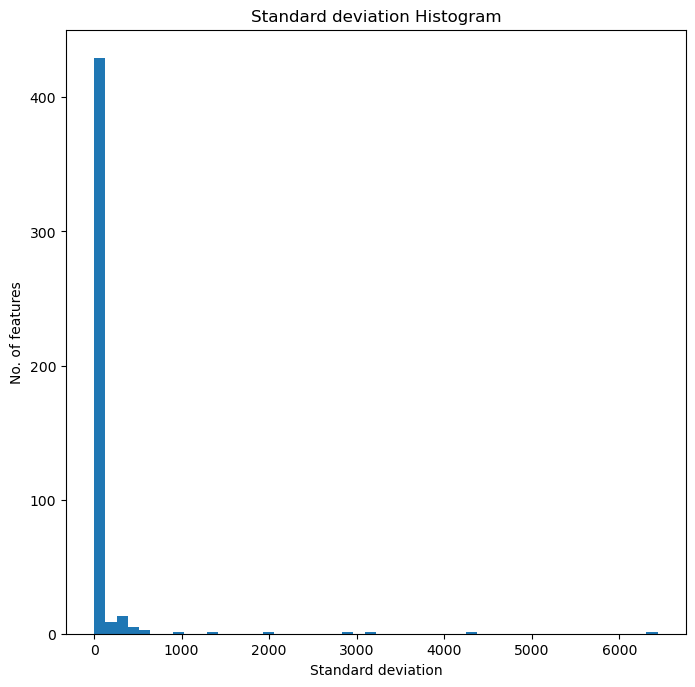

In [38]:
# Checking std of remaining features

def StandardDeviation(df):
    import matplotlib.pyplot as plt

    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std(), bins = 50)
    plt.gca().set(title='Standard deviation Histogram', ylabel='No. of features', xlabel='Standard deviation');
    plt.show()
    
StandardDeviation(X_train)

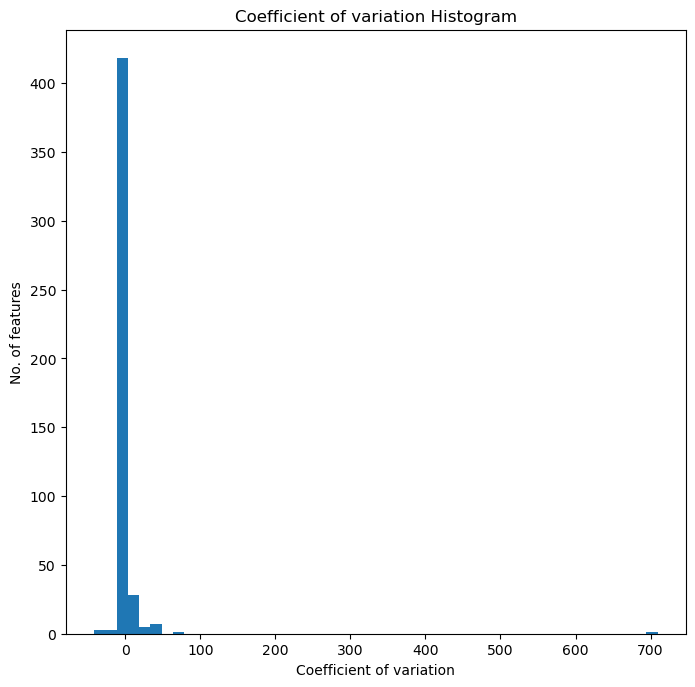

In [39]:
# Checking coeff std of remaining features
def CoefficientOfVariation(df):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std()/df.mean(), bins = 50)
    plt.gca().set(title='Coefficient of variation Histogram', ylabel='No. of features', xlabel='Coefficient of variation');
    plt.show()

CoefficientOfVariation(X_train)

<AxesSubplot:>

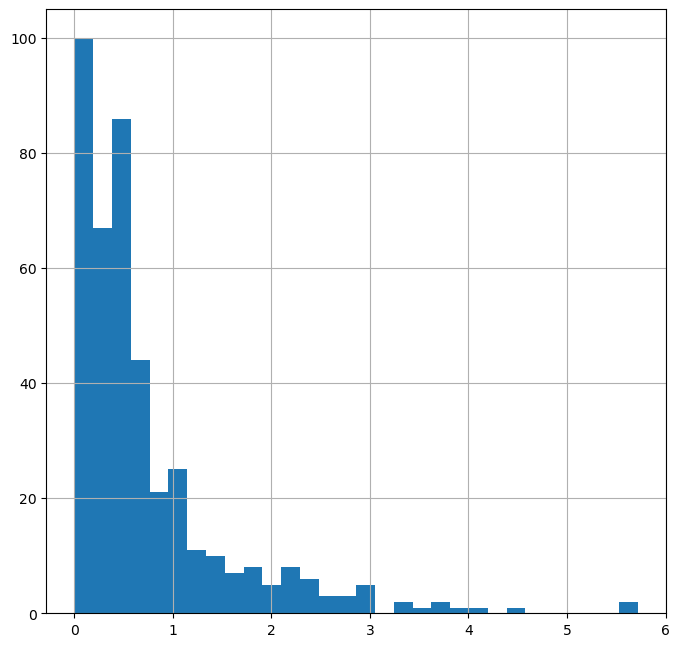

In [40]:
# histogram of the coefficient standard deviation of a percentage of features with the least coeffstd
feature_coeffstd = pd.DataFrame(summary.loc['std',:]/abs(summary.loc['mean',:])).sort_values(by=[0])
percentage_features = int(len(feature_coeffstd)*90/100)
feature_coeffstd.iloc[0:percentage_features,0].hist(bins=30)

In [41]:
# a percentage of features with the least coeffstd to remove
percentageToAnalyze = 0

percentage_features_rm = int(len(feature_coeffstd)*percentageToAnalyze/100)
feature_index = feature_coeffstd.index
features_least_volatile = feature_index[0:percentage_features_rm]
print("Number of least Volatiles", len(features_least_volatile))
print(features_least_volatile)

Number of least Volatiles 0
Index([], dtype='object')


In [42]:
# dropping a percentage of features with the least coeffstd
X_train.drop(features_least_volatile, axis = 1, inplace = True)

In [43]:
X_train

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,2484.55,2242.8555,1430.7270,0.8832,106.2100,0.1216,1.5613,-0.0028,0.0008,...,NaN,NaN,0.4979,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057
1261.0,2953.63,2384.04,2191.2111,1437.5003,2.2073,97.6444,0.1235,1.3584,-0.0024,-0.0048,...,NaN,NaN,0.4968,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
1041.0,3021.61,2440.29,2227.2222,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,...,NaN,NaN,0.5091,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
1181.0,3093.46,2479.17,2221.3667,2490.6947,1.2667,88.6578,0.1220,1.3537,0.0134,-0.0039,...,NaN,NaN,0.5006,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
611.0,3010.40,NaN,2172.4000,1148.4101,1.2614,102.4522,0.1227,1.3843,-0.0010,-0.0004,...,NaN,NaN,0.5015,0.0137,0.0034,2.7339,0.0252,0.0157,0.0046,62.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,2453.53,2188.7222,1325.5230,1.1721,105.1700,0.1250,1.4480,-0.0233,0.0087,...,NaN,NaN,0.4949,0.0155,0.0034,3.1238,0.0253,0.0058,0.0018,22.7661
1101.0,2880.58,2489.76,2256.6000,2365.4787,1.1384,85.4278,0.1205,1.6114,0.0484,0.0043,...,0.0076,50.7949,0.5032,0.0117,0.0029,2.3282,0.0398,0.0202,0.0076,50.7949
1469.0,2968.78,2451.53,2207.1000,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,...,0.0084,185.3578,0.4972,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578


### 4.3 Outlier Identification

In [44]:
# Funtion for Outlier treatment
def Outlier(X, outlier_treatment) :
    
    if outlier_treatment == 'NaN' :
        # calculating the z score of the values
        z_train= pd.DataFrame(stats.zscore(X,nan_policy='omit'))
        z_train

        # calculating the number of outliers
        print('Number of Outliers : ',sum(z_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))

        #Outlier treatment : replacing outliers with NA to impute all NA values
        is_outlier = abs(z_train)>3
        is_outlier.columns = X.columns
        is_outlier.index = X.index
        return(X.mask(is_outlier, np.nan))
    
    elif outlier_treatment == '3s':
        boundary = 3
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
        X = X.apply(lambda x : [y if y < boundary or np.isnan(y) else boundary for y in x])
        X = X.apply(lambda x : [y if y > -1*boundary or np.isnan(y) else -1*boundary for y in x])
        
        # for inverse transformation
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        X_inverse.columns = X.columns
        return(X_inverse)




In [45]:
# Outlier treatment with NA values
X_train = Outlier(X_train, 'NaN')

Number of Outliers :  4985


In [46]:
#X_train = Outlier(X_train, '3s')

### 4.4 Missing value Imputation

In [47]:
# function for imputing missing values
def MissingValueImputation(X, Imputer) :
    
    if Imputer == 'KNN' :
        
        #Scaling
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
        
        #define imputer
        KNN_imputer = KNNImputer(n_neighbors=10, weights = 'uniform')

        #fit on the dataset
        X = KNN_imputer.fit_transform(X)
        
        #Inverse tranform of scaling
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        return(X_inverse)
        
    elif Imputer == 'MICE' :
        
        #define imputer
        MICE_imputer = IterativeImputer(max_iter=20, sample_posterior=False, random_state=40)
        
        #fit dataset
        return(MICE_imputer.fit_transform(X))

#### 4.4.1. KNN

In [48]:
# impute using knn
X_train_KNN = X_train.copy(deep=True)
X_train_KNN.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'KNN'))

In [49]:
X_train_KNN.isna().sum().sum()

0

#### 4.4.2. MICE

In [50]:
# impute using mice
X_train_MICE = X_train.copy(deep=True)
X_train_MICE.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'MICE'))

C:\Users\s0576758\.conda\envs\ML\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [51]:
X_train_MICE.isna().sum().sum()

0

### 4.5. Evaluation of imputation

#### 4.5.1 Density plots

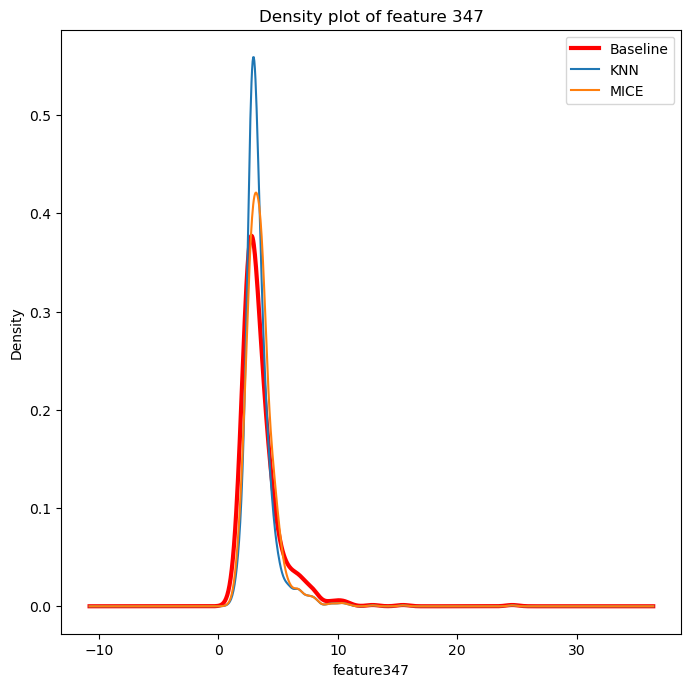

In [52]:
# Visualization of a variable with most missing values

X_train['feature347'].plot(kind='kde',c='red',linewidth=3)
X_train_KNN['feature347'].plot(kind='kde')
X_train_MICE['feature347'].plot(kind='kde')
labels = ['Baseline', 'KNN','MICE']
plt.legend(labels)
plt.xlabel('feature347')
plt.gca().set(title='Density plot of feature 347');

78


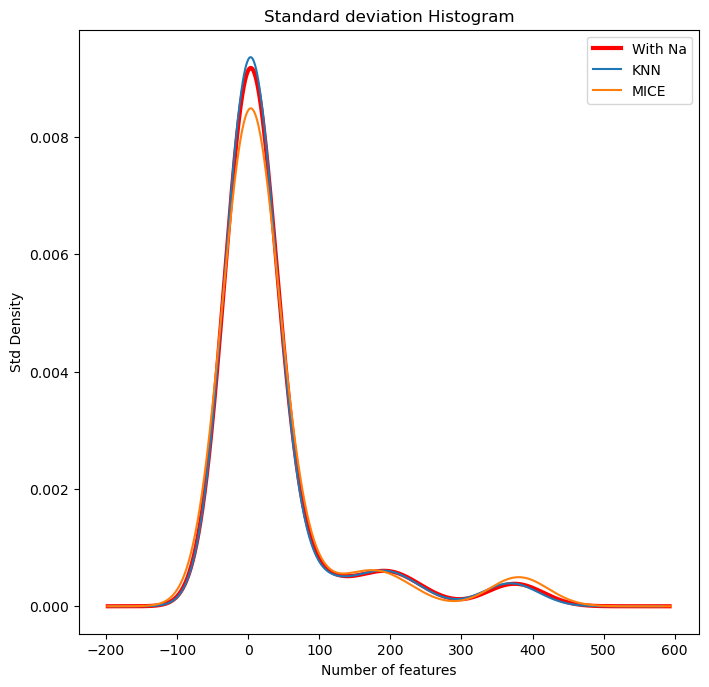

In [53]:
# plot the std of the features with more than 3% of missing values before and after imputation with knn and mice
feature_missing_sum = pd.DataFrame((X_train.isna()).sum())
percentage_missing_filter = 3/100
feature_filter = feature_missing_sum[feature_missing_sum[0]>=(len(X_train.loc[:,])*percentage_missing_filter)].index

print(len(feature_filter))

summary_with_na = X_train[feature_filter].describe(include='all')
feature_std_with_na = pd.DataFrame(summary_with_na.loc['std',:])
feature_std_sort_with_na = feature_std_with_na.sort_values(by=['std'])

summary_knn = X_train_KNN[feature_filter].describe(include='all')
feature_std_knn = pd.DataFrame(summary_knn.loc['std',:])
feature_std_sort_knn = feature_std_knn.sort_values(by=['std'])

summary_mice = X_train_MICE[feature_filter].describe(include='all')
feature_std_mice = pd.DataFrame(summary_mice.loc['std',:])
feature_std_sort_mice = feature_std_mice.sort_values(by=['std'])

feature_std_sort_with_na.iloc[:,0].plot(kind='kde',c='red',linewidth=3)
feature_std_sort_knn.iloc[:,0].plot(kind='kde')
feature_std_sort_mice.iloc[:,0].plot(kind='kde')
labels = ['With Na', 'KNN','MICE']
plt.legend(labels)
plt.gca().set(title='Standard deviation Histogram', ylabel='Std Density', xlabel='Number of features');

## 4.6. Feature Selection

### 4.6.1 Boruta

In [133]:
#Boruta function

def BorutaFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    # define random forest classifier
    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
    model.fit(X, y)
    
    # define Boruta feature selection method
    feature_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=40, max_iter=200)

    # find all relevant features
    feature_selector.fit(X.to_numpy(),y)

    # check selected features
    feature_selector.support_

    # check ranking of features
    feature_selector.ranking_

    # zip feature names, ranks, and decisions 
    feature_ranks = list(zip(feature_names, 
                             feature_selector.ranking_, 
                             feature_selector.support_))

    # print the results
    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features = list()
    indexes = np.where(feature_selector.support_ == True)
    for x in np.nditer(indexes):
        final_features.append(feature_names[x])
    print(final_features)
    
    
    # call transform() on X to filter it down to selected features
    return pd.DataFrame(X.filter(final_features)) , final_features


In [134]:
# apply Boruta and store selected features in the variable
X_train , final_features = BorutaFeatureSelection(X_train_MICE,y_train)

Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	0
Tentative: 	47
Rejected: 	419
Iteration: 	9 / 200
Confirmed: 	10
Tentative: 	37
Rejected: 	419
Iteration: 	10 / 200
Confirmed: 	10
Tentative: 	37
Rejected: 	419
Iteration: 	11 / 200
Confirmed: 	10
Tentative: 	37
Rejected: 	419
Iteration: 	12 / 200
Confirmed: 	10
Tentative: 	33
Rejected: 	423
Iteration: 	13 / 200
Confirmed: 	10
Tentative: 	33
Rejected: 	423
Iteration: 	14 / 200
Confirmed: 	10
Tentative: 	33
Rejected: 	423
Iteration: 	15 / 200
Confirmed: 	10
Tentative: 	33
Rejected: 	423
Iteration: 	16 / 200
Confirmed: 	1

### 4.6.2 Overview of remaining features


In [135]:
# Descriptive statistics
X_train.describe()

,feature001,feature034,feature041,feature060,feature065,feature066,feature104,feature113,feature125,feature126,...,feature161,feature247,feature248,feature296,feature384,feature432,feature461,feature511,feature519,feature520
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,...,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,3012.629714,8.823875,68.001634,2.737057,20.508422,26.644444,-0.009805,0.462006,15.796071,1.183309,...,490.057767,3.692373,0.046686,218.233858,0.505093,17.751913,29.056512,52.238347,1.597019,10.099199
std,68.756824,0.399684,23.844760,8.160919,4.932174,8.745295,0.002825,0.006148,0.113478,0.267286,...,362.912807,0.909268,0.037190,160.979450,0.240894,12.502942,12.255537,24.424448,0.386900,8.058063
min,2816.810000,7.603200,1.434000,-21.205500,6.448200,-197.775152,-0.018500,0.390374,15.467714,0.605500,...,28.000000,-10.017282,0.000000,13.622900,0.087500,1.239100,7.953400,0.000000,-3.735663,0.000000
25%,2967.540000,8.578800,74.480000,-1.929100,17.362700,22.992000,-0.011800,0.459300,15.730000,0.974400,...,295.000000,3.520982,0.025100,130.306100,0.397475,11.056900,20.363900,35.320100,1.530400,5.429400
50%,3011.458362,8.770000,78.300000,0.860000,20.018200,26.247000,-0.010100,0.462081,15.780000,1.144000,...,434.000000,3.689349,0.042553,194.165500,0.478072,16.213400,26.311100,47.276100,1.598267,9.270531
75%,3054.810000,9.035500,80.270000,4.381800,22.872700,29.921200,-0.008100,0.465000,15.870000,1.338000,...,613.000000,3.913633,0.049769,271.296100,0.557706,21.417300,35.748700,63.378200,1.692660,10.818620
max,3232.640000,10.963400,86.120000,29.750900,48.308165,52.551250,-0.000700,0.488500,16.090000,2.022000,...,3389.247708,10.463200,0.252646,1509.688522,4.606701,119.356000,90.973038,160.493800,4.517100,59.664900


In [136]:
#datatype and shape
print(X_train.info())
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1253 entries, 567.0 to 645.0
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature001  1253 non-null   float64
 1   feature034  1253 non-null   float64
 2   feature041  1253 non-null   float64
 3   feature060  1253 non-null   float64
 4   feature065  1253 non-null   float64
 5   feature066  1253 non-null   float64
 6   feature104  1253 non-null   float64
 7   feature113  1253 non-null   float64
 8   feature125  1253 non-null   float64
 9   feature126  1253 non-null   float64
 10  feature131  1253 non-null   float64
 11  feature161  1253 non-null   float64
 12  feature247  1253 non-null   float64
 13  feature248  1253 non-null   float64
 14  feature296  1253 non-null   float64
 15  feature384  1253 non-null   float64
 16  feature432  1253 non-null   float64
 17  feature461  1253 non-null   float64
 18  feature511  1253 non-null   float64
 19  feature519  1253 non

array([[<AxesSubplot:title={'center':'feature001'}>,
        <AxesSubplot:title={'center':'feature034'}>,
        <AxesSubplot:title={'center':'feature041'}>,
        <AxesSubplot:title={'center':'feature060'}>,
        <AxesSubplot:title={'center':'feature065'}>],
       [<AxesSubplot:title={'center':'feature066'}>,
        <AxesSubplot:title={'center':'feature104'}>,
        <AxesSubplot:title={'center':'feature113'}>,
        <AxesSubplot:title={'center':'feature125'}>,
        <AxesSubplot:title={'center':'feature126'}>],
       [<AxesSubplot:title={'center':'feature131'}>,
        <AxesSubplot:title={'center':'feature161'}>,
        <AxesSubplot:title={'center':'feature247'}>,
        <AxesSubplot:title={'center':'feature248'}>,
        <AxesSubplot:title={'center':'feature296'}>],
       [<AxesSubplot:title={'center':'feature384'}>,
        <AxesSubplot:title={'center':'feature432'}>,
        <AxesSubplot:title={'center':'feature461'}>,
        <AxesSubplot:title={'center':'featu

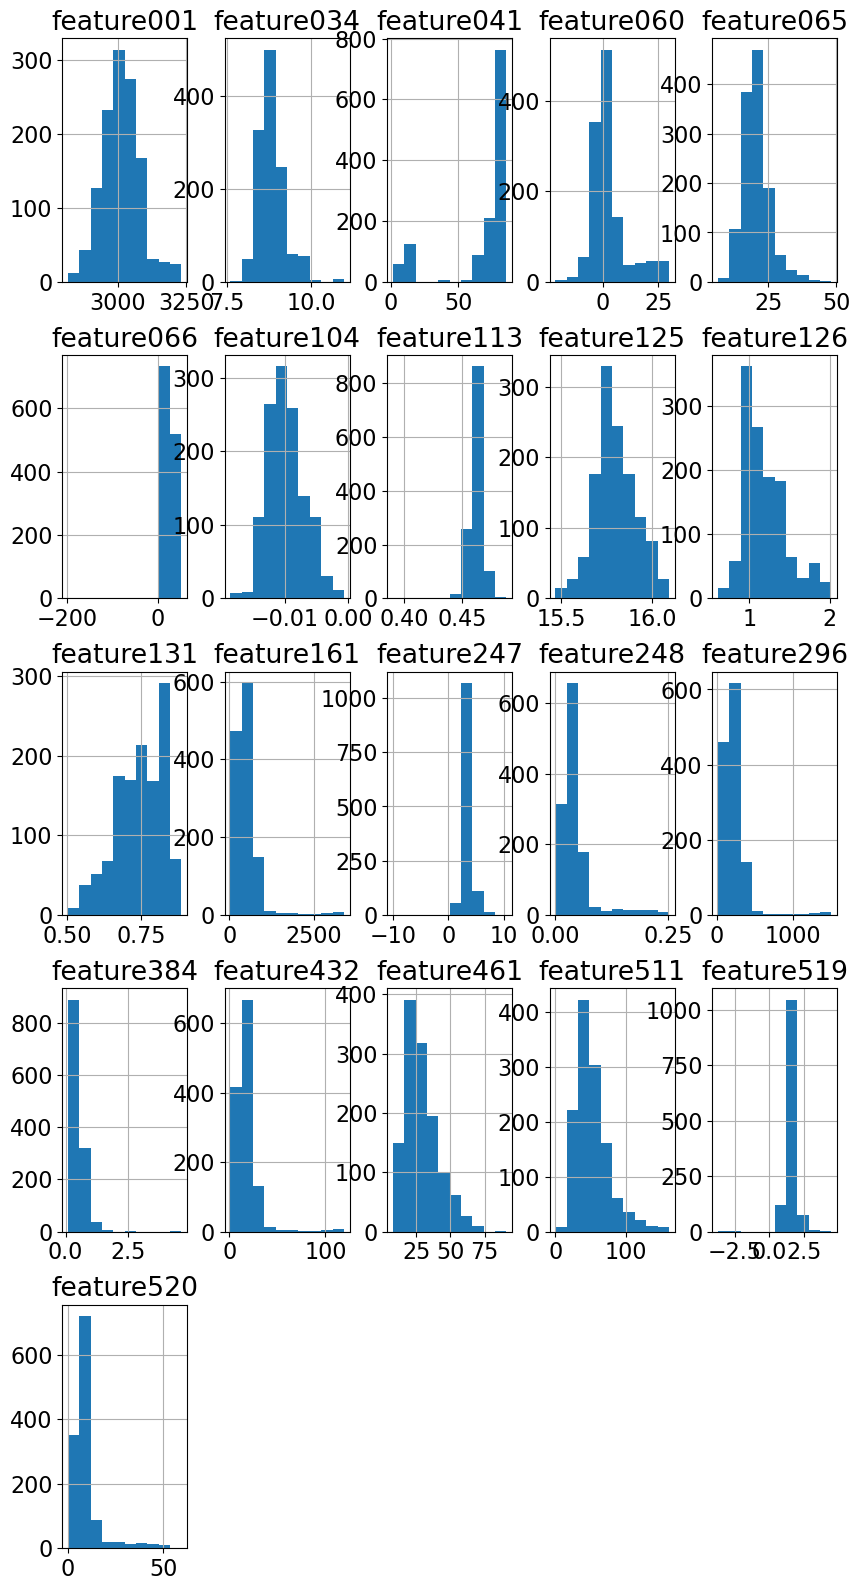

In [137]:
# Histogram of the features
X_train.hist(figsize=(10,20))

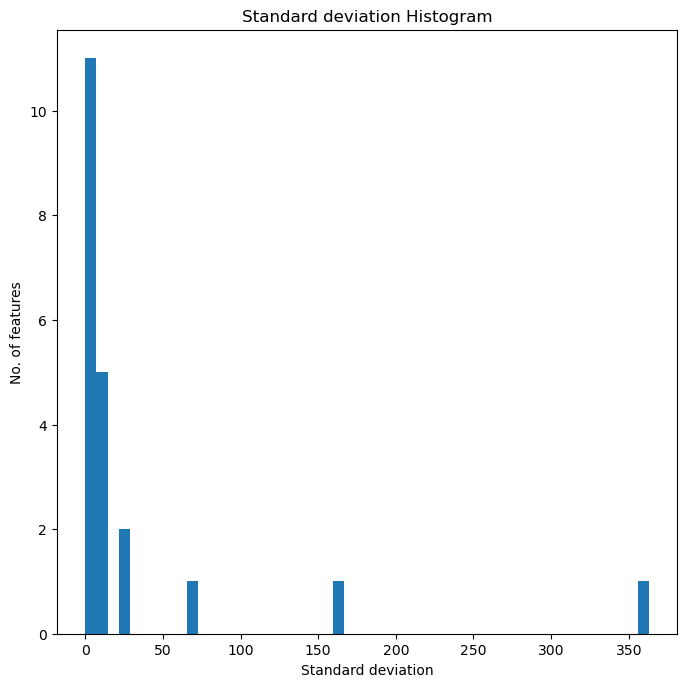

In [138]:
# Histogram of Standard Deviation of the remaining features
StandardDeviation(X_train)

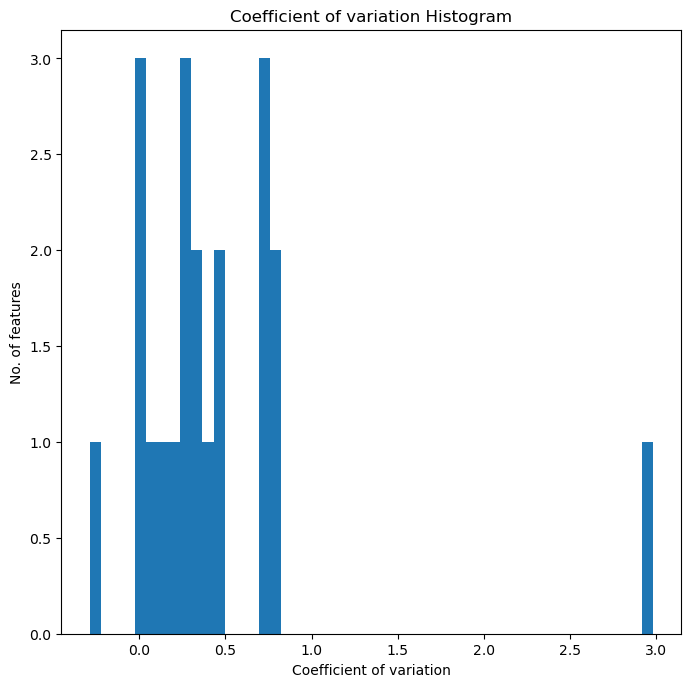

In [139]:
# Histogram of Coefficient of Standard Deviation of the remaining features
CoefficientOfVariation(X_train)

In [140]:
# Correlation of the remaining features

# Heatmap of correlation
corr = pd.DataFrame(X_train.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,feature001,feature034,feature041,feature060,feature065,feature066,feature104,feature113,feature125,feature126,feature131,feature161,feature247,feature248,feature296,feature384,feature432,feature461,feature511,feature519,feature520
feature001,1.00,-0.04,-0.04,-0.09,-0.03,-0.00,-0.06,-0.04,-0.00,0.02,0.02,0.03,-0.03,-0.04,0.02,-0.05,0.03,0.01,-0.04,-0.03,-0.03
feature034,-0.04,1.00,-0.13,0.15,0.08,0.08,0.13,0.15,0.07,-0.10,0.02,0.03,-0.00,0.08,0.03,0.04,0.03,0.07,0.07,-0.00,0.08
feature041,-0.04,-0.13,1.00,-0.10,-0.01,-0.03,-0.06,-0.04,-0.07,0.06,-0.01,-0.07,0.00,-0.09,-0.08,-0.02,-0.07,-0.03,-0.04,0.00,-0.09
feature060,-0.09,0.15,-0.10,1.00,-0.45,-0.27,0.35,0.17,0.07,-0.18,0.04,0.07,0.13,0.24,0.07,0.15,0.06,0.07,0.29,0.13,0.23
feature065,-0.03,0.08,-0.01,-0.45,1.00,0.57,0.13,0.08,-0.07,0.00,0.02,-0.02,-0.06,0.09,-0.01,0.06,-0.01,0.06,0.09,-0.06,0.08
feature066,-0.00,0.08,-0.03,-0.27,0.57,1.00,0.10,0.31,-0.01,-0.04,0.03,-0.01,0.31,-0.02,-0.01,-0.32,-0.00,-0.00,0.11,0.28,0.08
feature104,-0.06,0.13,-0.06,0.35,0.13,0.10,1.00,0.15,0.12,-0.24,0.07,0.12,0.05,0.28,0.12,0.09,0.11,0.03,0.63,0.05,0.27
feature113,-0.04,0.15,-0.04,0.17,0.08,0.31,0.15,1.00,0.03,-0.05,0.01,0.08,0.14,-0.10,0.08,-0.11,0.07,0.07,0.15,0.12,-0.09
feature125,-0.00,0.07,-0.07,0.07,-0.07,-0.01,0.12,0.03,1.00,-0.05,0.14,0.09,-0.04,0.02,0.09,-0.11,0.07,0.01,0.09,-0.03,0.02
feature126,0.02,-0.10,0.06,-0.18,0.00,-0.04,-0.24,-0.05,-0.05,1.00,-0.62,-0.07,-0.01,-0.11,-0.07,-0.04,-0.06,0.09,-0.19,-0.01,-0.11


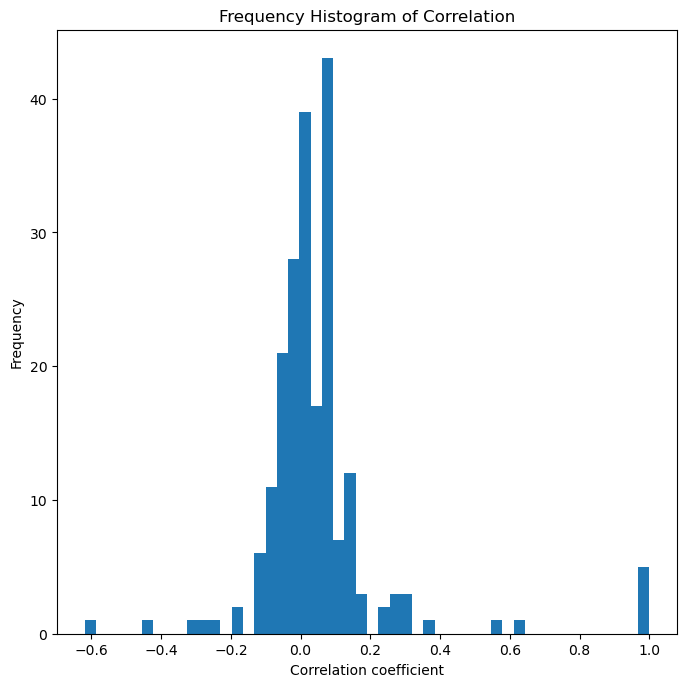

In [141]:
# Histogram of the Correlation of the remaining features
correlation(X_train)

## 5. Modeling

### 5.1. Balancing

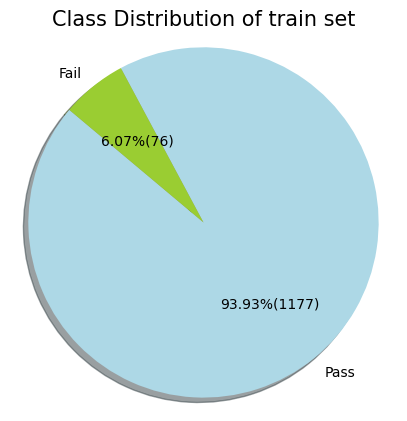

In [143]:
#Pie chart of the imbalanced train data
ClassDistributionGraph(y_train, 'Class Distribution of train set')

## Sampling technique

In [144]:
# Sampling using SMOTE

def Sampling(X_train, y_train, sampler):

    #SMOTE
    if sampler == 'SMOTE':
        sampler = SMOTE(sampling_strategy ='minority', random_state=40)    
    
    #ROSE
    if sampler == 'ROSE':
        sampler = RandomOverSampler(random_state=40)

    #ADASYN
    if sampler == 'ADASYN':
        sampler = ADASYN(random_state=40)
    
    #enn
    if sampler =='ENN':
        from imblearn.under_sampling import EditedNearestNeighbours
        sampler = EditedNearestNeighbours(random_state=40)
    
    #SMOTTEENN
    if sampler == 'SMOTEENN' :
        sampler = SMOTEENN(random_state=40)
        
    #SMOTETomek
    if sampler == 'SMOTETomek':
        from imblearn.combine import SMOTETomek 
        sampler = SMOTETomek(random_state=40)
        
    #BorderlineSMOTE
    if sampler == 'BorderlineSMOTE':
        from imblearn.over_sampling import BorderlineSMOTE 
        sampler = BorderlineSMOTE(random_state=40)

    if sampler == 'Cluster':
        from imblearn.under_sampling import ClusterCentroids
        sampler= ClusterCentroids(random_state=40)
        
    if sampler == "randomunder":
        from imblearn.under_sampling import RandomUnderSampler
        sampler = RandomUnderSampler(random_state=40)
        
    if sampler == 'Instant' :
        from imblearn.under_sampling import InstanceHardnessThreshold
        X_train.index = X_train.index.astype(int)
        y_train.index = y_train.index.astype(int)
        sampler = InstanceHardnessThreshold(random_state=40, estimator=RandomForestClassifier())
        
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    counter = Counter(y_resampled)
    print(counter)
    return X_resampled, y_resampled





In [145]:
# Imbalance treatment
from imblearn.under_sampling import EditedNearestNeighbours
X_resampled, y_resampled = Sampling(X_train, y_train,'SMOTEENN')

Counter({'FAIL': 1080, 'PASS': 799})


In [146]:
X_train

,feature001,feature034,feature041,feature060,feature065,feature066,feature104,feature113,feature125,feature126,...,feature161,feature247,feature248,feature296,feature384,feature432,feature461,feature511,feature519,feature520
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,8.5288,78.520,1.4845,18.5155,25.4260,-0.0146,0.455500,15.77,0.9649,...,374.0,3.666582,0.019500,168.1031,0.406676,13.6996,22.7157,62.3288,1.590152,4.272400
1261.0,2953.63,9.0402,8.438,1.7273,18.2727,22.1740,-0.0124,0.456924,16.08,1.1540,...,227.0,2.215600,0.042288,100.6525,0.346500,8.9011,32.6879,21.8402,0.960200,9.347644
1041.0,3021.61,8.8581,13.600,-3.7509,23.7509,30.7593,-0.0086,0.459166,15.71,1.8340,...,225.0,3.725089,0.050467,97.2193,0.519201,8.6034,21.7993,39.7080,1.613600,11.093923
1181.0,3093.46,8.7782,81.400,1.3555,18.6445,22.2300,-0.0107,0.468000,15.64,1.0210,...,242.0,2.439300,0.021000,106.9279,0.261000,9.2676,36.7423,20.4651,1.059100,4.490400
611.0,3010.40,8.5615,79.000,2.3900,17.6100,25.5921,-0.0095,0.461922,15.94,0.8845,...,418.0,3.670224,0.047016,204.2392,0.557878,15.7706,15.0259,68.7831,1.587946,10.020827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,8.5862,80.260,-3.1227,23.1227,31.4849,-0.0111,0.442000,15.54,1.2390,...,1047.0,3.243600,0.222300,434.9291,0.319700,38.7634,16.1068,45.9459,1.399000,50.293500
1101.0,2880.58,8.9818,12.940,0.1982,19.8018,23.4628,-0.0116,0.459304,15.77,1.4650,...,447.0,4.322300,0.054657,206.0362,0.337100,16.7588,18.7968,33.6207,1.881900,11.993915
1469.0,2968.78,8.6384,78.330,1.2518,18.7482,24.1495,-0.0112,0.456999,15.61,1.3800,...,59.0,5.397200,0.041779,32.6637,0.992400,2.6616,31.6738,50.7795,2.310100,9.582695


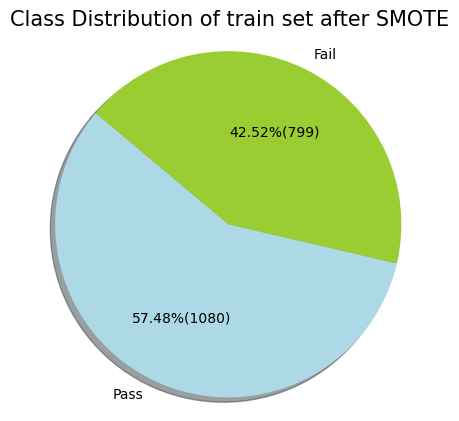

In [147]:
# Pie Chart to visualize balanced data
ClassDistributionGraph(y_resampled, 'Class Distribution of train set after SMOTE')

### 5.2 Preparing Test data

In [148]:
## Rough feature reduction

X_test = X_test_

X_test = X_test.drop(columns = 'timestamp')
X_test = X_test.drop(columns = single_value_columns)
X_test = X_test.drop(columns = missing_value_cols)
X_test = X_test.drop(columns = features_least_volatile)
                    
# Outlier treatment 
X_test = Outlier(X_test,'NaN')

## Missing Value imputation
X_test.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_test,'MICE'))




Number of Outliers :  1473


In [149]:
## Feature selection 
X_test = X_test.filter(final_features)

# View processed test set
X_test


,feature001,feature034,feature041,feature060,feature065,feature066,feature104,feature113,feature125,feature126,...,feature161,feature247,feature248,feature296,feature384,feature432,feature461,feature511,feature519,feature520
ID,,,,,,,,,,,,,,,,,,,,,
766.0,2939.40,8.7073,77.760,-0.2418,20.2418,24.7587,-0.0099,0.464100,15.63,1.0590,...,591.0,3.808197,0.031600,244.8106,-0.548324,20.8815,18.7707,57.7947,-2.057455,6.819300
1231.0,3045.98,8.8355,76.440,4.6891,15.3109,14.6060,-0.0088,0.453436,15.98,1.1350,...,328.0,3.760653,0.053137,153.2971,0.979261,12.7478,53.9906,52.4964,0.426763,11.410433
723.0,3056.40,8.3436,12.190,1.7618,18.2382,23.5304,-0.0101,0.456400,15.79,0.9554,...,650.0,3.927041,0.019800,266.3136,-0.116661,21.5178,10.7413,45.6576,1.065401,4.329800
1470.0,2898.17,9.7137,81.460,0.0064,19.9936,23.1671,-0.0126,0.460597,15.69,1.2200,...,95.0,5.915200,0.048575,43.8824,0.697198,3.7721,37.5476,27.8884,2.502600,10.912034
401.0,2951.56,8.6013,76.970,4.5027,15.4973,22.3374,-0.0057,0.455800,15.76,1.3470,...,314.0,3.987868,0.014200,137.3132,-0.402362,12.1741,17.4238,54.0305,0.592941,3.109100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28.0,2988.99,8.9336,76.690,17.3873,22.6127,27.4102,-0.0078,0.476000,16.05,0.9554,...,420.0,3.590847,0.033200,177.2362,-0.882408,15.3734,30.4356,69.6774,0.936858,6.975700
584.0,2949.82,8.7994,2.332,11.2909,8.7091,13.8957,-0.0111,0.459100,15.91,1.1350,...,517.0,3.129994,0.031200,232.9440,0.367575,19.3000,14.2373,39.5062,-0.148279,6.793900
953.0,3071.15,8.6695,79.210,0.4200,19.5800,26.5186,-0.0087,0.459000,15.82,1.1820,...,276.0,4.295400,0.018800,114.3343,0.318100,10.6625,29.9729,50.4298,1.854100,4.102700


### 5.4 Model Evaluation


## Grid Search

### 5.4.1 Random Forest

In [70]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Criterion
criterion=['gini', 'entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#class-weight
class_weight = ["balanced", "balanced_subsample"]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'class_weight': class_weight}
print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=40, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_resampled, y_resampled)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'class_weight': ['balanced', 'balanced_subsample']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
rf_random.best_estimator_

## 5.4.2 XGBoost

In [ ]:
?XGBClassifier

In [150]:
# A parameter grid for XGBoost
params = {
    "learning_rate"    : [ 0.10, 0.20, 0.5 ] ,
    "max_depth"        : [ 20, 50, 100],
    "min_child_weight" : [ 1, 2, 5, 10],
    "gamma"            : [ 0.1, 0.5, 1.0 ],
    "colsample_bytree" : [ 0.1, 0.5 , 0.9 ]
}

In [ ]:
# A parameter grid for XGBoost
params = {
    "learning_rate"    : [ 0.10, 0.20, 0.30, 0.5 ] ,
    "max_depth"        : [ 6, 8, 10, 15, 20, 50, 100],
    "min_child_weight" : [ 1, 2, 5, 10, 20 ],
    "gamma"            : [ 0.1, 0.2 , 0.3, 0.4, 0.5, 1.0 ],
    "colsample_bytree" : [ 0.1, 0.3, 0.5 ,0.7, 0.9 ]
}

In [151]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

grid_search = GridSearchCV(xgb, param_grid=params, scoring='balanced_accuracy', cv=3, verbose=1)

grid_search.fit(X_resampled, y_resampled)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[19:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [129]:
?sklearn.metrics.SCORERS.keys

Object `sklearn.metrics.SCORERS.keys` not found.


In [152]:
results = pd.DataFrame(random_search.cv_results_)
results_sorted = results.sort_values('rank_test_score', ascending='True')
pd.DataFrame(results_sorted)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,1.315920,0.043630,0.009288,0.000463,1,12,0.1,0.3,0.7,"{'min_child_weight': 1, 'max_depth': 12, 'lear...",...,0.996644,0.998264,0.990856,0.999537,0.991319,0.998727,0.998242,0.994813,0.004053,1
8,0.905045,0.045649,0.009498,0.000807,1,6,0.15,0.2,0.7,"{'min_child_weight': 1, 'max_depth': 6, 'learn...",...,0.996412,0.997569,0.984259,0.999306,0.995370,0.997917,0.998359,0.994547,0.004771,2
4,0.868984,0.021229,0.009738,0.000973,1,12,0.3,0.0,0.7,"{'min_child_weight': 1, 'max_depth': 12, 'lear...",...,0.996759,0.998843,0.983796,0.999190,0.994792,0.999074,0.998476,0.994026,0.005149,3
3,0.307553,0.036104,0.007439,0.003602,3,4,0.2,0.1,0.5,"{'min_child_weight': 3, 'max_depth': 4, 'learn...",...,0.991435,0.998148,0.983102,0.998843,0.995949,0.998148,0.998476,0.993181,0.005489,4
0,0.315887,0.016386,0.005315,0.003914,5,4,0.25,0.2,0.7,"{'min_child_weight': 5, 'max_depth': 4, 'learn...",...,0.996181,0.997801,0.981481,0.999421,0.990741,0.998264,0.998711,0.992012,0.006461,5
6,0.477623,0.030054,0.009076,0.000299,5,8,0.3,0.1,0.4,"{'min_child_weight': 5, 'max_depth': 8, 'learn...",...,0.989236,0.998611,0.984144,0.999306,0.993171,1.000000,0.997070,0.991894,0.006238,6
1,0.287055,0.029242,0.003566,0.004169,7,12,0.25,0.1,0.5,"{'min_child_weight': 7, 'max_depth': 12, 'lear...",...,0.993519,0.998032,0.981366,0.997222,0.993056,0.998380,0.994960,0.991660,0.005999,7
2,0.247465,0.010249,0.004073,0.003899,7,4,0.25,0.0,0.5,"{'min_child_weight': 7, 'max_depth': 4, 'learn...",...,0.989583,0.996991,0.978356,0.997801,0.992014,0.997685,0.997539,0.991258,0.006128,8
9,0.403854,0.034811,0.008441,0.003214,7,4,0.25,0.4,0.4,"{'min_child_weight': 7, 'max_depth': 4, 'learn...",...,0.988310,0.995949,0.983565,0.998611,0.991782,0.996875,0.998711,0.990982,0.006035,9
7,0.507044,0.016962,0.009575,0.000661,3,3,0.25,0.4,0.7,"{'min_child_weight': 3, 'max_depth': 3, 'learn...",...,0.986921,0.993171,0.976736,0.998495,0.992477,0.994560,0.998945,0.988436,0.008217,10


In [153]:

print('\n Best estimator:')
print(random_search.best_estimator_)

print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best hyperparameters:
{'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}


## Model Function

In [75]:
from sklearn.metrics import confusion_matrix

In [154]:
# fucntion to build , predit and assess the model
def run_ML_process(X, y, X_test, y_test, clf):
    #scaling
    #scaler = StandardScaler()
    #scaler.fit(X)
    #X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
    #X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    #Evaluation using Startified K Fold cross validation
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(clf, X, y, cv=cv, scoring = 'accuracy')
    print('Averace Accuracy:', scores.mean())

    #fit
    clf.fit(X, y)
    
    #predict
    y_pred_test = clf.predict(X_test)
    
    # View accuracy score
    print('Accuracy: ', accuracy_score(y_test, y_pred_test))
    
    #Plot confussion matrix
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.title("Test Confusion Matrix")
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
    
    # View the classification report for test data and predictions
    print(classification_report(y_test, y_pred_test))
    

    con_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
    cost_matrix = pd.DataFrame({0: [0, 1], 1: [10, 0]})
    # Apply element-wise multiplication:
    cost = con_matrix.mul(cost_matrix).to_numpy().sum()
    print("COST: ",cost)

                            
    #ROC curve
    
    #Prediction probabilities
    clf_probs = clf.predict_proba(X_test)
    
    #Probabilities of the positive outcome is kept
    clf_probs = clf_probs[:, 1]

    
    #Area under ROC curve
    clf_auc = roc_auc_score(y_test, clf_probs)
    print('Area under ROC: AUROC = %.3f' % (clf_auc))
    
    #Calculate ROC
    clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs, pos_label ='PASS')

    #Plot ROC curve
    plt.figure()
    plt.plot(clf_fpr, clf_tpr, marker='.', label='Random Forest (AUROC = %0.2f)' % clf_auc)
    
    # Title
    
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    plt.show()
    
    
    #Cohens kappa
    kappa = cohen_kappa_score(y_pred_test, y_test, weights='quadratic')
    print("Kappa:" , kappa)

### 5.3.1 Random Forest

Averace Accuracy: 0.9680708840596199
Accuracy:  0.8662420382165605
              precision    recall  f1-score   support

        FAIL       0.10      0.16      0.12        19
        PASS       0.94      0.91      0.93       295

    accuracy                           0.87       314
   macro avg       0.52      0.53      0.53       314
weighted avg       0.89      0.87      0.88       314

COST:  186
Area under ROC: AUROC = 0.690


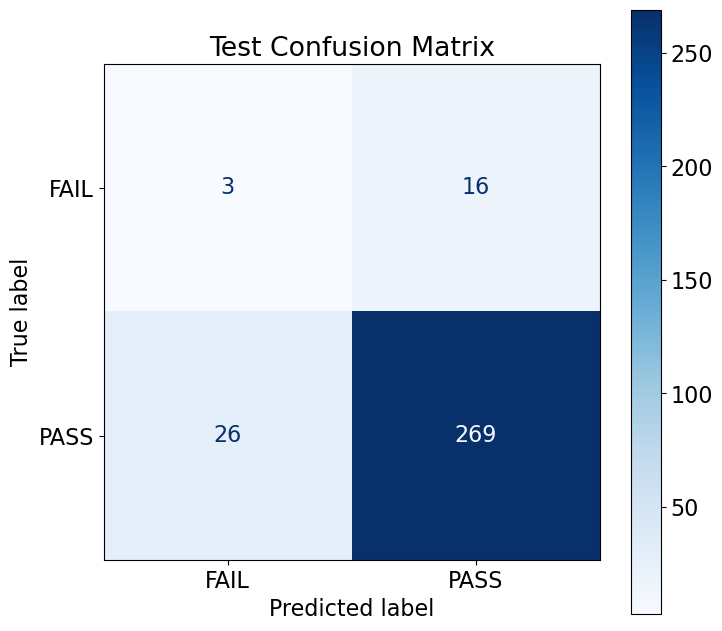

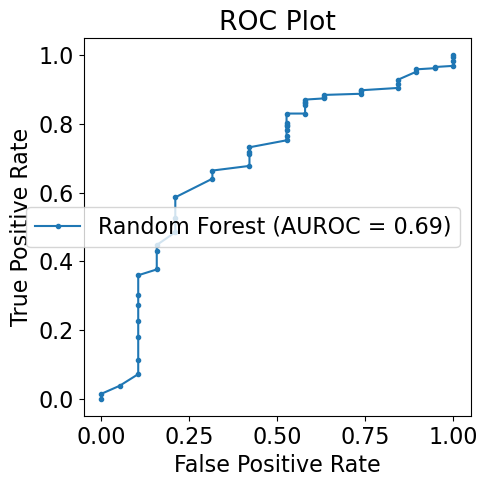

Kappa: 0.05597709377236926


In [155]:
# Random Forest modelstClass
run_ML_process(X_resampled, y_resampled, X_test, y_test, RandomForestClassifier(random_state=40))

### 5.3.2 XGBoost

In [156]:
import warnings
warnings.filterwarnings('ignore')

[19:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

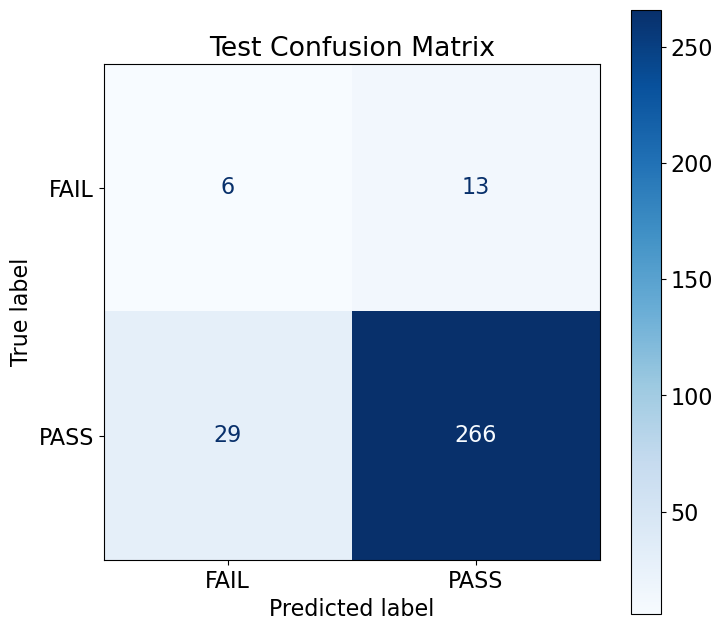

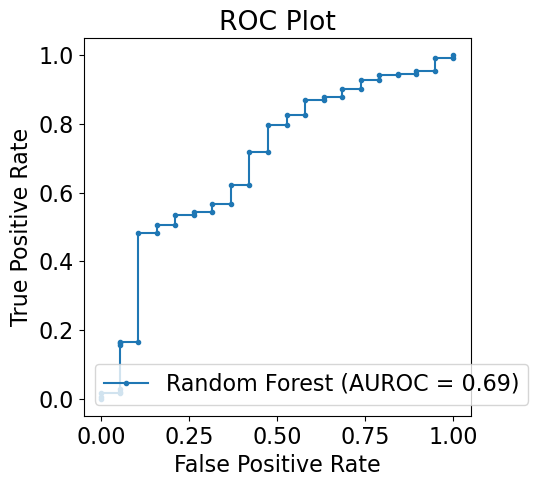

Kappa: 0.15602201459106624


In [157]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(random_state=40))

[19:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

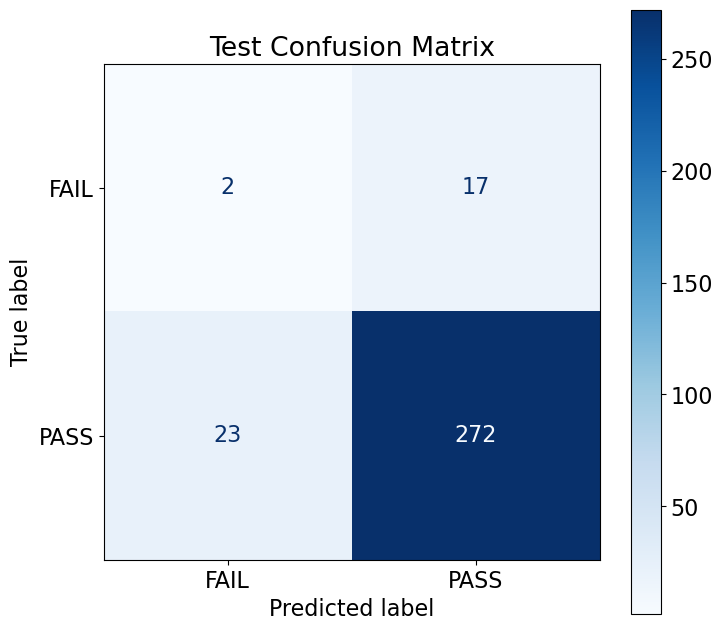

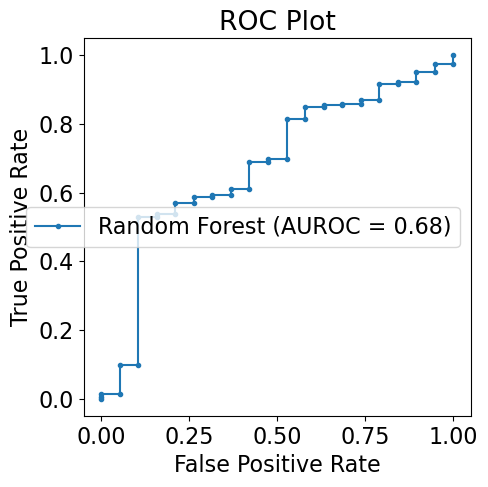

Kappa: 0.0237836157313851


In [158]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, grid_search.best_estimator_)

In [ ]:
random_search.best_estimator_

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
clf = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

## Transformation

In [ ]:
# Transform

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

X_transformed = X_resampled
X_transformed.iloc[:,:] = pt.fit_transform(X_resampled)

X_transformed

In [ ]:
X_test_transformed = X_test
X_test_transformed.iloc[:,:] = pt.fit_transform(X_test)

X_test_transformed

In [ ]:
# Random Forest model
run_ML_process(X_transformed, y_resampled, X_test_transformed, y_test, RandomForestClassifier())

In [ ]:
# XGBoost
run_ML_process(X_resampled_scaled, y_resampled, X_test_scaled, y_test, XGBClassifier())

In [ ]:
#MLP and GridSearch


from sklearn.neural_network import MLPClassifier


mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


from sklearn.model_selection import GridSearchCV


cv = StratifiedKFold(n_splits=3)
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=cv)
clf.fit(X_resampled, y_resampled) # X is train samples and y is the corresponding labels




In [ ]:
print('Best parameters found:\n', clf.best_params_)

In [ ]:
clf.best_estimator_

In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
clf = MLPClassifier(alpha=0.05, hidden_layer_sizes=(10, 30, 10),
              learning_rate='adaptive', max_iter=100)


clf.fit(X_resampled, y_resampled)
y_true, y_pred = y_test , clf.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

In [ ]:
#Plot confussion matrix
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
    

In [ ]:
?RandomForestClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Criterion
criterion=['gini', 'entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#class-weight
class_weight = ["balanced", "balanced_subsample"]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'class_weight': class_weight}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = cv, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_resampled, y_resampled)

In [ ]:
rf_random.best_params_


In [ ]:
rf = RandomForestClassifier(n_estimators= 2000, min_samples_split= 10, min_samples_leaf= 1, max_features= 'auto', 
                            max_depth = 30, class_weight= 'balanced', bootstrap= False)

In [ ]:
rf= rf_random.best_estimator_

In [ ]:
rf

In [ ]:
#predict
rf.fit(X_resampled, y_resampled)
y_pred_test = rf.predict(X_test)
    
# View accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred_test))
    
#Plot confussion matrix
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(rf, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
    
    # View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))
    
    
    #ROC curve
    
    #Prediction probabilities
rf_probs = rf.predict_proba(X_test)
    
    #Probabilities of the positive outcome is kept
rf_probs = rf_probs[:, 1]

    
    #Area under ROC curve
rf_auc = roc_auc_score(y_test, rf_probs)
print('Area under ROC: AUROC = %.3f' % (rf_auc))
    
    #Calculate ROC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label ='FAIL')

    #Plot ROC curve
plt.figure()
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
    
    # Title
    
plt.title('ROC Plot')
    # Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
    # Show legend
plt.legend() # 
    # Show plot
plt.show()